# Librabries 

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

# EDA

In [2]:
bike = pd.read_csv("Seoul_Bike.csv")

DOI
10.24432/C5F62R
License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand


@misc{misc_seoul_bike_sharing_demand_560,
  title        = {{Seoul Bike Sharing Demand}},
  year         = {2020},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5F62R}
}

In [3]:
bike.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
bike.tail(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
bike.shape

(8760, 14)

In [6]:
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Changing from categorical to numerical

In [8]:
bike["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [9]:
bike["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [10]:
bike["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
bike['Seasons'].replace('Winter', 0, inplace = True)
bike['Seasons'].replace('Spring', 1, inplace = True)
bike['Seasons'].replace('Summer', 2, inplace = True)
bike['Seasons'].replace('Autumn', 3, inplace = True)

In [12]:
bike['Seasons'].tail(2)

8758    3
8759    3
Name: Seasons, dtype: int64

In [13]:
bike["Holiday"].replace('No Holiday', 0, inplace = True)
bike["Holiday"].replace('Holiday', 1, inplace = True)

In [14]:
bike["Holiday"].tail(2)

8758    0
8759    0
Name: Holiday, dtype: int64

In [15]:
bike["Functioning Day"].replace('No', 0, inplace = True)
bike["Functioning Day"].replace('Yes', 1, inplace = True)

In [16]:
bike["Functioning Day"].tail(2)

8758    1
8759    1
Name: Functioning Day, dtype: int64

# Correlation

In [17]:
bike.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1


In [18]:
bike_d = bike.drop(["Date"], axis = 1)

In [19]:
bike_d.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = bike_d.columns
vif_data["VIF"] = [variance_inflation_factor(bike_d.values, i) for i in range(bike_d.shape[1])]
print(vif_data)

                     Variable        VIF
0           Rented Bike Count   4.809547
1                        Hour   5.126869
2             Temperature(°C)  48.311669
3                 Humidity(%)  23.518772
4            Wind speed (m/s)   4.902158
5            Visibility (10m)   9.648789
6   Dew point temperature(°C)  26.268525
7     Solar Radiation (MJ/m2)   2.915193
8                Rainfall(mm)   1.105233
9               Snowfall (cm)   1.122288
10                    Seasons   5.147940
11                    Holiday   1.063372
12            Functioning Day  33.003909


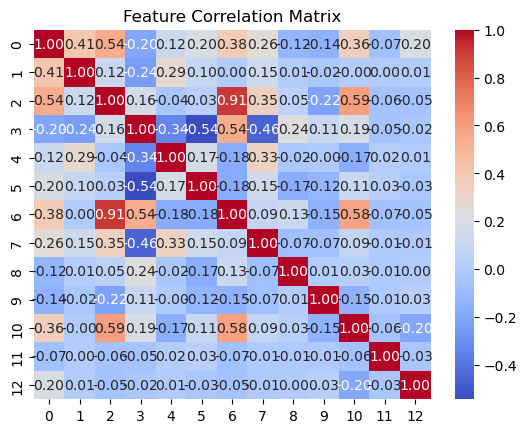

In [21]:
corr_matrix = np.corrcoef(bike_d, rowvar = False)

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            xticklabels = range(bike_d.shape[1]), yticklabels = range(bike_d.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()

The highest correlations are between: 
- Rented Bike Count & Temperature(°C) = 0.54 (0 & 2)
- Temperature(°C) & Dew point temperature(°C) = 0.91 (2 & 6)
- Temperature(°C) & Seasons = 0.59 (2 & 10)
- Humidity(%) & Visibility (10m) = 0.54 (3 & 5)
- Humidity(%) & Dew point temperature(°C) = 0.54 (3 & 6)
- Dew point temperature(°C) & Seasons = 0.58 (6 & 10)

In [22]:
import numpy as np

eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)


Eigenvalues: [2.95834564 2.48467964 0.00454541 0.18533645 0.34481846 0.42012253
 1.24195471 0.61745254 1.10179842 0.80679647 0.98584064 0.91028096
 0.93802814]


In [23]:
condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)


Condition Number: 25.511624597490144


In [24]:
def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = bike_d.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

Pairs of highly correlated variables: [(2, 10), (0, 2), (2, 6), (6, 10), (3, 6), (3, 5)]


In [25]:
bike_d.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The 

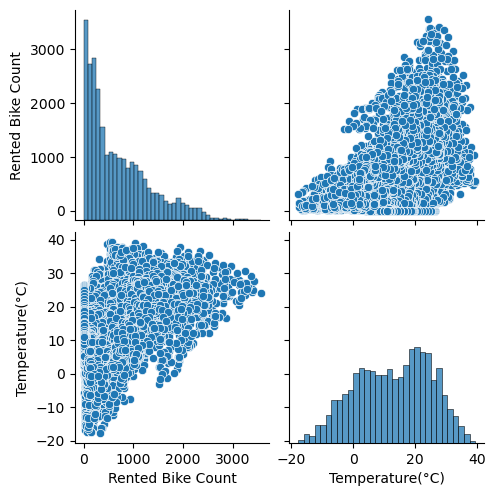

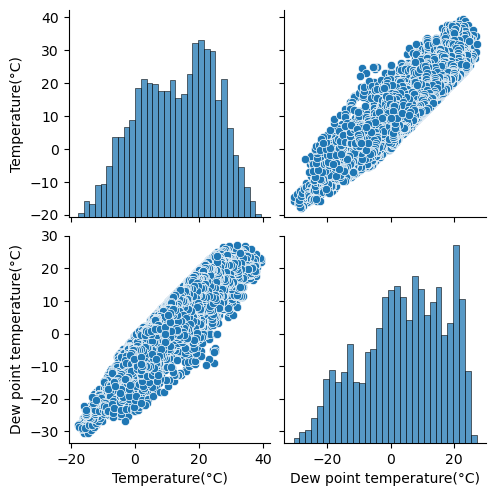

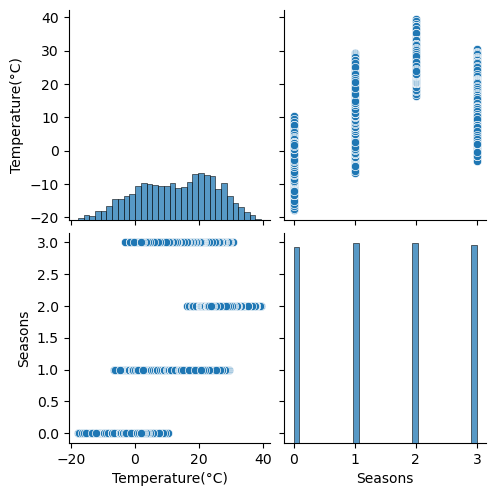

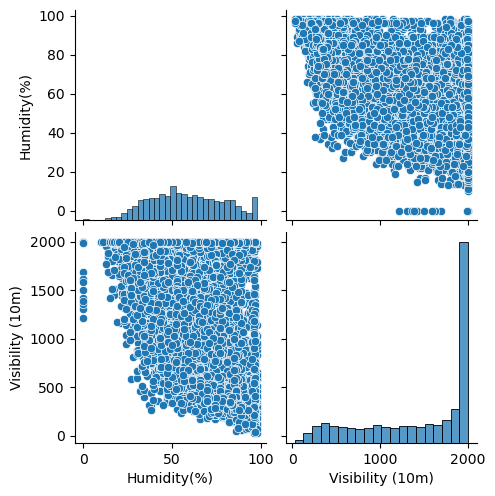

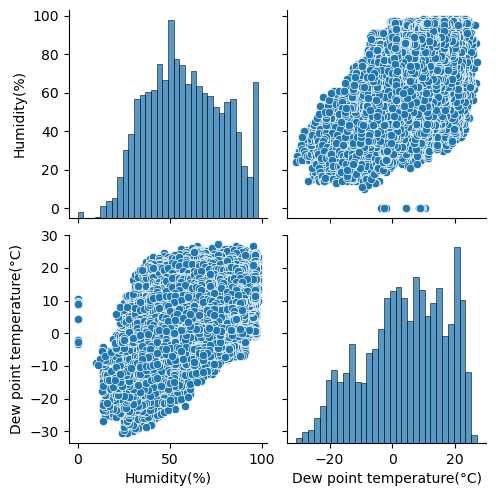

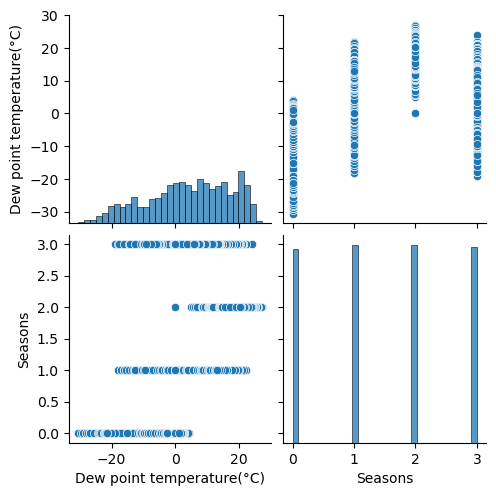

In [26]:
sns.pairplot(bike[["Rented Bike Count", "Temperature(°C)"]])

#sns.pairplot(bike[["Rented Bike Count", "Seasons"]])

sns.pairplot(bike[["Temperature(°C)", "Dew point temperature(°C)"]])

sns.pairplot(bike[["Temperature(°C)", "Seasons"]])

sns.pairplot(bike[["Humidity(%)", "Visibility (10m)"]])

sns.pairplot(bike[["Humidity(%)", "Dew point temperature(°C)"]])

sns.pairplot(bike[["Dew point temperature(°C)", "Seasons"]])

Rented Bike Count & Temperature(°C) = 0.54 (0 & 2)

Temperature(°C) & Dew point temperature(°C) = 0.91 (2 & 6)

Temperature(°C) & Seasons = 0.59 (2 & 10)

Humidity(%) & Visibility (10m) = 0.54 (3 & 5)

Humidity(%) & Dew point temperature(°C) = 0.54 (3 & 6)
Dew point temperature(°C) & Seasons = 0.58 (6 & 10

Multicollinearity

X = bike_d.iloc[:, 1:]  # All rows, columns from index 1 onwards (excluding the first column)
y = bike_d.iloc[:, 0]   # All rows, only the first column

In [27]:
bike_d2 = bike.drop(["Date", "Visibility (10m)", "Dew point temperature(°C)", "Seasons", "Holiday", "Functioning Day"], axis = 1)

In [28]:
bike_d2.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,0.0,0.0,0.0


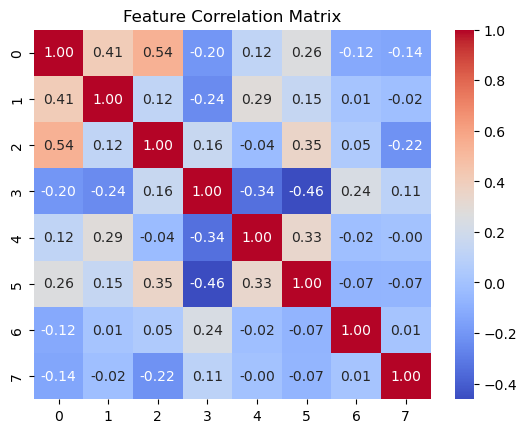

In [29]:
corr_matrix = np.corrcoef(bike_d2, rowvar = False)

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            xticklabels = range(bike_d2.shape[1]), yticklabels = range(bike_d2.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()

In [30]:
import numpy as np

eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.30501078 1.48845607 0.22373965 0.43508645 0.62660268 0.8840208
 0.96495307 1.07213051]


In [31]:
condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)

Condition Number: 3.2097041653301455


In [32]:
def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = bike_d2.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

Pairs of highly correlated variables: [(0, 2)]


In [33]:
bike_d2.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,0.0,0.0,0.0


In [34]:
bike_d3 = bike.drop(["Date", 
                     "Humidity(%)", "Wind speed (m/s)", 
                     "Visibility (10m)", "Dew point temperature(°C)",
                     "Solar Radiation (MJ/m2)", "Rainfall(mm)",
                     "Snowfall (cm)",
                     "Seasons", "Holiday", "Functioning Day"], axis = 1)

In [35]:
bike_d3.head(2)

,Rented Bike Count,Hour,Temperature(°C)
0,254,0,-5.2
1,204,1,-5.5


In [36]:
bike_array = bike_d3.values

In [37]:
X = bike_array[:, 1:]

y = bike_array[:, 0]

In [38]:
y

array([254., 204., 173., ..., 694., 712., 584.])

In [39]:
X

array([[ 0. , -5.2],
       [ 1. , -5.5],
       [ 2. , -6. ],
       ...,
       [21. ,  2.6],
       [22. ,  2.1],
       [23. ,  1.9]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [41]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8760, 2), (8760,), (7008, 2), (1752, 2), (7008,), (1752,))

In [42]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled  = scaler.transform(X_test)

X_scaled = scaler.transform(X)

# Models

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled, y_train)

yp_lr = linear_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lr)
mse_r = mean_squared_error(y_test, yp_lr, squared = False)
r2 = r2_score(y_test, yp_lr)

n = len(y_test)
k = X_train_scaled.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 242817.70559788027
Root Mean Squared Error: 492.76536566390325
R-squared: 0.3991796133882427
Adjusted R-squared: 0.39849256892099083


In [45]:
train_pred = linear_reg.predict(X_train_scaled)
test_pred = linear_reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

Training MSE: 246198.12060337863
Validation MSE: 242817.70559788027


## No overfitting but low R2

## 30% Training MSE: 242346.04562180358
Validation MSE: 253067.87962849034

In [46]:
import tensorflow as tf
def huber_loss(y_test, yp_lr, delta=1.0):
    error = y_test - yp_lr
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_lr, delta=1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Mean Huber Loss: 360.61065113969966


In [47]:
score_l = cross_val_score(LinearRegression(), X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_l

0.39460955763442185

In [48]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lr})
pred.head()

,Actual,Predicted
0,278.0,831.860917
1,96.0,-22.764604
2,215.0,603.995434
3,1290.0,967.730262
4,165.0,718.654236


## Polynomial 2 and 3

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
poly_features = PolynomialFeatures(degree = 2)

X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p2 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p2)
mse_r = mean_squared_error(y_test, yp_p2, squared = False)
r2 = r2_score(y_test, yp_p2)

n = len(y_test)
k = X_train_scaled.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 220932.85232122723
Root Mean Squared Error: 470.0349479785809
R-squared: 0.4533307963682661
Adjusted R-squared: 0.4527056743515345


In [51]:
score_lp2 = cross_val_score(poly_reg, X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_lp2

0.39460955763442185

In [52]:
pred_p2 = pd.DataFrame({'Actual': y_test, 'Predicted': yp_p2})
pred_p2.head()

,Actual,Predicted
0,278.0,524.901708
1,96.0,205.002854
2,215.0,519.436048
3,1290.0,990.160071
4,165.0,582.496980


train_pred = poly_reg.predict(X_train_poly)
test_pred = poly_reg.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_p2, delta=1.0):
    error = y_test - yp_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_p2, delta=1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

## Not overfitting 

In [53]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p3 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p3)
r2 = r2_score(y_test, yp_p3)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 202259.78873932717
R-squared: 0.4995348293603358


## Ridge

In [54]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # Adjust alpha based on the strength of regularization
ridge_reg.fit(X_train_scaled, y_train)

yp_lnR = ridge_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lnR)
r2 = r2_score(y_test, yp_lnR)

print(f'Mean Squared Error (Ridge): {mse}')
print(f'R-squared (Ridge): {r2}')

Mean Squared Error (Ridge): 242788.79081971946
R-squared (Ridge): 0.39925115919315257


In [55]:
pred_lnR = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lnR})
pred_lnR.head()

,Actual,Predicted
0,278.0,830.886403
1,96.0,-21.193754
2,215.0,603.804502
3,1290.0,967.492646
4,165.0,719.198340


In [56]:
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge_reg2 = Ridge(alpha = 10.0) 
ridge_reg2.fit(X_train_poly, y_train)

yp_rp2 = ridge_reg2.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, yp_rp2)
mse_ridge_r = mean_squared_error(y_test, yp_rp2, squared = False)
r2_ridge = r2_score(y_test, yp_rp2)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Root Mean Squared Error: {mse_ridge_r}')
print(f'R-squared (Ridge): {r2_ridge}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error (Ridge): 223465.61354643287
Root Mean Squared Error: 472.72149681015446
R-squared (Ridge): 0.4470638127692883
Adjusted R-squared: 0.3985641965392853


In [57]:
score_rp2 = cross_val_score(ridge_reg2, X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_rp2

0.38995153345812467

In [58]:
train_pred = ridge_reg2.predict(X_train_poly)
test_pred = ridge_reg2.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_rp2, delta = 1.0):
    error = y_test - yp_rp2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_rp2, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 226873.3318295576
Validation MSE: 223465.61354643287
Mean Huber Loss: 335.1979898962455


## No overfitting but significant difference between R2 and Adjusted R2

## Lasso

In [59]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0) 
lasso_reg.fit(X_train_scaled, y_train)

yp_lnL = lasso_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_lnL)
r2 = r2_score(y_test, yp_lnL)

print(f'Mean Squared Error (Lasso): {mse}')
print(f'R-squared (Lasso): {r2}')

Mean Squared Error (Lasso): 242764.9455925631
R-squared (Lasso): 0.39931016106273887


In [60]:
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
 
lasso_reg = Lasso(alpha = 10.0, max_iter = 100000)
lasso_reg.fit(X_train_poly, y_train)

yp_lp2 = lasso_reg.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, yp_lp2)
r2_lasso = r2_score(y_test, yp_lp2)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')

Mean Squared Error (Lasso): 226845.03330264846
R-squared (Lasso): 0.4387018843034318


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state = 12), param_grid, cv = 5, scoring = 'r2')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_best)
mse_r = mean_squared_error(y_test, y_pred_best, squared = False)
r2_best = r2_score(y_test, y_pred_best)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared (Best Model): {r2_best}')
print(f'Adjusted R-squared: {adj_r2}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}
Mean Squared Error: 167026.3267661557
Root Mean Squared Error: 408.6885449412005
R-squared (Best Model): 0.5867153839754451
Adjusted R-squared: 0.3986232658781337


In [63]:
score_rf = cross_val_score(RandomForestRegressor(max_depth = 10,
                                              min_samples_leaf = 4, 
                                              n_estimators = 200,
                                              random_state = 12), X_test_scaled, y_test, 
                           cv = 10, scoring = 'r2').mean()
score_rf

0.5410243375530565

In [64]:
pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
pred_rf.head(3)

,Actual,Predicted
0,278.0,338.867429
1,96.0,158.759999
2,215.0,166.600270


In [65]:
train_pred = best_model.predict(X_train_scaled)
test_pred = best_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred_best, delta = 1.0):
    error = y_test - y_pred_best
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred_best, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 121619.56725421119
Validation MSE: 167026.3267661557
Mean Huber Loss: 257.91922503534374


## Overfitting here and big difference between R2 and Adjusted R2

# ANN

In [66]:
 !pip install tensorflow
 !pip install keras

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [68]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs = 300, batch_size = 64, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Epoch 1/300
88/88 [==============================] - 0s 983us/step - loss: 913816.2500 - val_loss: 909973.0000
Epoch 2/300
88/88 [==============================] - 0s 456us/step - loss: 796563.8750 - val_loss: 582283.1875
Epoch 3/300
88/88 [==============================] - 0s 455us/step - loss: 380723.3125 - val_loss: 325009.1562
Epoch 4/300
88/88 [==============================] - 0s 489us/step - loss: 318255.1562 - val_loss: 316781.5312
Epoch 5/300
88/88 [==============================] - 0s 484us/step - loss: 309954.0312 - val_loss: 307681.3125
Epoch 6/300
88/88 [==============================] - 0s 474us/step - loss: 300712.1250 - val_loss: 297909.8750
Epoch 7/300
88/88 [==============================] - 0s 508us/step - loss: 291310.3438 - val_loss: 287669.1250
Epoch 8/300
88/88 [==============================] - 0s 471us/step - loss: 280930.9062 - val_loss: 276835.3438
Epoch 9/300
88/88 [==============================] - 0s 507us/step - loss: 271202.0312 - val_loss: 266267.8125
E

88/88 [==============================] - 0s 444us/step - loss: 210134.5625 - val_loss: 201449.4688
Epoch 75/300
88/88 [==============================] - 0s 447us/step - loss: 209205.0469 - val_loss: 202444.3750
Epoch 76/300
88/88 [==============================] - 0s 460us/step - loss: 210041.0156 - val_loss: 201307.0625
Epoch 77/300
88/88 [==============================] - 0s 452us/step - loss: 209390.0781 - val_loss: 200988.6406
Epoch 78/300
88/88 [==============================] - 0s 445us/step - loss: 208899.0156 - val_loss: 200704.6562
Epoch 79/300
88/88 [==============================] - 0s 444us/step - loss: 208673.8125 - val_loss: 200467.7812
Epoch 80/300
88/88 [==============================] - 0s 447us/step - loss: 208924.2031 - val_loss: 200767.4219
Epoch 81/300
88/88 [==============================] - 0s 556us/step - loss: 209451.3750 - val_loss: 200340.2969
Epoch 82/300
88/88 [==============================] - 0s 474us/step - loss: 208847.4531 - val_loss: 200836.5469
Epoch

Epoch 147/300
88/88 [==============================] - 0s 452us/step - loss: 200983.1719 - val_loss: 193336.4844
Epoch 148/300
88/88 [==============================] - 0s 449us/step - loss: 200992.6719 - val_loss: 193706.7656
Epoch 149/300
88/88 [==============================] - 0s 441us/step - loss: 200773.1562 - val_loss: 193916.8750
Epoch 150/300
88/88 [==============================] - 0s 445us/step - loss: 200365.6406 - val_loss: 196030.7500
Epoch 151/300
88/88 [==============================] - 0s 443us/step - loss: 201037.0156 - val_loss: 194271.1250
Epoch 152/300
88/88 [==============================] - 0s 444us/step - loss: 200891.8438 - val_loss: 193561.4062
Epoch 153/300
88/88 [==============================] - 0s 446us/step - loss: 200613.7188 - val_loss: 193482.7500
Epoch 154/300
88/88 [==============================] - 0s 471us/step - loss: 201143.3281 - val_loss: 193532.1875
Epoch 155/300
88/88 [==============================] - 0s 489us/step - loss: 200788.0625 - val_l

In [69]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 196180.03694292944
Root Mean Squared Error: 442.92215675322615
R-squared: 0.514578373305457
Adjusted R-squared: 0.5140232885407977


In [70]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

55/55 [==============================] - 0s 319us/step
Training MSE: 198086.95355021115
Validation MSE: 196180.03694292944
Huber Loss: [[ 79.87503052 261.87503052 142.87503052 ... 403.12496948  69.87503052
  103.87503052]
 [102.73574829  78.26425171  39.73574829 ... 586.73574829 112.73574829
   78.73574829]
 [ 32.72001648 148.27998352  29.27998352 ... 516.72001648  42.72001648
    8.72001648]
 ...
 [453.91448975 635.91448975 516.91448975 ...  29.08551025 443.91448975
  477.91448975]
 [120.2064209   60.7935791   57.2064209  ... 604.2064209  130.2064209
   96.2064209 ]
 [227.67105103 409.67105103 290.67105103 ... 255.32894897 217.67105103
  251.67105103]]
Mean Huber Loss: 606.9261563336494


## 30% Training MSE: 190473.52005780334
Validation MSE: 200931.60889353

In [71]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs = 300, batch_size = 64, validation_split=0.3, callbacks=[early_stopping])

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Epoch 1/300
77/77 [==============================] - 0s 1ms/step - loss: 916747.8750 - val_loss: 907233.6250
Epoch 2/300
77/77 [==============================] - 0s 665us/step - loss: 841071.5625 - val_loss: 698551.0000
Epoch 3/300
77/77 [==============================] - 0s 663us/step - loss: 464029.5625 - val_loss: 322566.7188
Epoch 4/300
77/77 [==============================] - 0s 653us/step - loss: 323693.4688 - val_loss: 316730.1250
Epoch 5/300
77/77 [==============================] - 0s 673us/step - loss: 317727.6250 - val_loss: 311015.0000
Epoch 6/300
77/77 [==============================] - 0s 749us/step - loss: 311605.7188 - val_loss: 305070.0938
Epoch 7/300
77/77 [==============================] - 0s 715us/step - loss: 305428.6562 - val_loss: 297355.5312
Epoch 8/300
77/77 [==============================] - 0s 755us/step - loss: 299137.5000 - val_loss: 290234.5938
Epoch 9/300
77/77 [==============================] - 0s 744us/step - loss: 292218.0000 - val_loss: 283164.9688
Epo

77/77 [==============================] - 0s 568us/step - loss: 214644.0156 - val_loss: 197357.9531
Epoch 75/300
77/77 [==============================] - 0s 589us/step - loss: 214852.6875 - val_loss: 197561.8906
Epoch 76/300
77/77 [==============================] - 0s 581us/step - loss: 214077.0625 - val_loss: 199977.5625
Epoch 77/300
77/77 [==============================] - 0s 557us/step - loss: 213741.8594 - val_loss: 197920.2344
Epoch 78/300
77/77 [==============================] - 0s 562us/step - loss: 214942.2812 - val_loss: 198076.0625
Epoch 79/300
77/77 [==============================] - 0s 607us/step - loss: 213787.2031 - val_loss: 195821.4688
Epoch 80/300
77/77 [==============================] - 0s 583us/step - loss: 213358.6250 - val_loss: 196331.3750
Epoch 81/300
77/77 [==============================] - 0s 577us/step - loss: 213614.1875 - val_loss: 196318.7656
Epoch 82/300
77/77 [==============================] - 0s 605us/step - loss: 213168.6562 - val_loss: 196494.8906
Epoch

Epoch 147/300
77/77 [==============================] - 0s 564us/step - loss: 199757.7031 - val_loss: 185185.4531
Epoch 148/300
77/77 [==============================] - 0s 576us/step - loss: 200247.9375 - val_loss: 184151.5156
Epoch 149/300
77/77 [==============================] - 0s 563us/step - loss: 200019.2500 - val_loss: 184672.4531
Epoch 150/300
77/77 [==============================] - 0s 558us/step - loss: 199382.3906 - val_loss: 183104.0156
Epoch 151/300
77/77 [==============================] - 0s 559us/step - loss: 198915.6094 - val_loss: 182796.5625
Epoch 152/300
77/77 [==============================] - 0s 552us/step - loss: 198790.9219 - val_loss: 182456.2812
Epoch 153/300
77/77 [==============================] - 0s 540us/step - loss: 198883.8594 - val_loss: 182987.4062
Epoch 154/300
77/77 [==============================] - 0s 550us/step - loss: 198440.3594 - val_loss: 182653.6719
Epoch 155/300
77/77 [==============================] - 0s 555us/step - loss: 198516.7500 - val_l

77/77 [==============================] - 0s 557us/step - loss: 180042.4375 - val_loss: 167219.7812
Epoch 220/300
77/77 [==============================] - 0s 568us/step - loss: 179536.1875 - val_loss: 165193.8281
Epoch 221/300
77/77 [==============================] - 0s 560us/step - loss: 179593.5469 - val_loss: 164650.3281
Epoch 222/300
77/77 [==============================] - 0s 557us/step - loss: 179178.3438 - val_loss: 165407.4375
Epoch 223/300
77/77 [==============================] - 0s 617us/step - loss: 181286.3125 - val_loss: 170817.2344
Epoch 224/300
77/77 [==============================] - 0s 668us/step - loss: 179707.5312 - val_loss: 164561.6406
Epoch 225/300
77/77 [==============================] - 0s 624us/step - loss: 178799.8438 - val_loss: 165122.2656
Epoch 226/300
77/77 [==============================] - 0s 575us/step - loss: 177859.9531 - val_loss: 164601.1250
Epoch 227/300
77/77 [==============================] - 0s 561us/step - loss: 178975.4688 - val_loss: 166761.78

77/77 [==============================] - 0s 552us/step - loss: 172616.0156 - val_loss: 161340.7969
Epoch 292/300
77/77 [==============================] - 0s 569us/step - loss: 173361.4375 - val_loss: 161422.7188
Epoch 293/300
77/77 [==============================] - 0s 620us/step - loss: 172645.5781 - val_loss: 161802.5781
Epoch 294/300
77/77 [==============================] - 0s 869us/step - loss: 173252.3125 - val_loss: 161417.9062
Epoch 295/300
77/77 [==============================] - 0s 641us/step - loss: 173135.2812 - val_loss: 161729.0938
Epoch 296/300
77/77 [==============================] - 0s 593us/step - loss: 173445.1875 - val_loss: 159955.7188
Epoch 297/300
77/77 [==============================] - 0s 596us/step - loss: 172024.5781 - val_loss: 160377.1094
Epoch 298/300
77/77 [==============================] - 0s 603us/step - loss: 171984.8906 - val_loss: 160395.3750
Epoch 299/300
77/77 [==============================] - 0s 648us/step - loss: 172018.7812 - val_loss: 161334.62

In [72]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 196180.03694292944
Root Mean Squared Error: 442.92215675322615
R-squared: 0.514578373305457
Adjusted R-squared: 0.5140232885407977


In [73]:
train_pred = model.predict(X_train_scaled)
test_pred = model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)
print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

55/55 [==============================] - 0s 263us/step
Training MSE: 168236.86330629137
Validation MSE: 172954.45006784497
Huber Loss: [[ 79.87503052 261.87503052 142.87503052 ... 403.12496948  69.87503052
  103.87503052]
 [102.73574829  78.26425171  39.73574829 ... 586.73574829 112.73574829
   78.73574829]
 [ 32.72001648 148.27998352  29.27998352 ... 516.72001648  42.72001648
    8.72001648]
 ...
 [453.91448975 635.91448975 516.91448975 ...  29.08551025 443.91448975
  477.91448975]
 [120.2064209   60.7935791   57.2064209  ... 604.2064209  130.2064209
   96.2064209 ]
 [227.67105103 409.67105103 290.67105103 ... 255.32894897 217.67105103
  251.67105103]]
Mean Huber Loss: 606.9261563336494


## No overfitting 


## 30% Training MSE: 167561.7460854632
Validation MSE: 182676.4375581989

# SVM

In [74]:
from sklearn import svm

In [75]:
regressor = svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5)

regressor.fit(X_train_scaled, y_train)

yp_svm = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_svm)
mse_r = mean_squared_error(y_test, yp_svm, squared = False)
r2 = r2_score(y_test, yp_svm)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 260812.0098650761
Root Mean Squared Error: 510.6975718221853
R-squared: 0.35465508079698926
Adjusted R-squared: 0.3539171220557623


In [76]:
score_svm = cross_val_score(svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5), 
                            X_test_scaled, y_test, cv = 10, scoring = 'r2').mean()
score_svm

0.22382072257431407

In [77]:
pred_svm = pd.DataFrame({'Actual': y_test, 'Predicted': yp_svm})
pred_svm.head()

,Actual,Predicted
0,278.0,715.132368
1,96.0,83.647308
2,215.0,545.293195
3,1290.0,799.546194
4,165.0,614.944886


In [78]:
regressor = svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2)

regressor.fit(X_train_scaled, y_train)

yp_svm_p2 = regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_svm_p2)
mse_r = mean_squared_error(y_test, yp_svm_p2, squared = False)
r2 = r2_score(y_test, yp_svm_p2)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 226015.57144926663
Root Mean Squared Error: 475.4109500729518
R-squared: 0.44075427825963653
Adjusted R-squared: 0.44011477486142003


In [79]:
score_svr = cross_val_score(svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2), 
                            X_test_scaled, y_test, cv = 10, scoring = 'r2').mean()
score_svr

0.43712128689851515

In [80]:
train_pred = regressor.predict(X_train_scaled)
test_pred = regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_svm_p2, delta = 1.0):
    error = y_test - yp_svm_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_svm_p2, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 230861.0609871089
Validation MSE: 226015.57144926663
Mean Huber Loss: 332.35711018672214


## No overfitting 

## 30% Training MSE: 228137.12938671483
Validation MSE: 234311.1493008199

# KNN

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}  # Adjust the range based on your data
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
#knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
#knn_regressor.fit(X_train, y_train)

best_k

9

In [83]:
knn_regressor = KNeighborsRegressor(n_neighbors = 9, metric='manhattan') 

knn_regressor.fit(X_train_scaled, y_train)

yp_knn = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_knn)
mse_r = mean_squared_error(y_test, yp_knn, squared = False)
r2 = r2_score(y_test, yp_knn)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 171021.93224674446
Root Mean Squared Error: 413.5479805859829
R-squared: 0.5768287852050449
Adjusted R-squared: 0.5763448844448449


In [84]:
score_knn = cross_val_score(KNeighborsRegressor(n_neighbors = 9), 
                            X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_knn

0.566962709582967

In [85]:
pred_knn = pd.DataFrame({'Actual': y_test, 'Predicted': yp_knn})
pred_knn.head()

,Actual,Predicted
0,278.0,328.333333
1,96.0,139.777778
2,215.0,172.888889
3,1290.0,997.000000
4,165.0,421.666667


In [86]:
train_pred = knn_regressor.predict(X_train_scaled)
test_pred = knn_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn, delta = 1.0):
    error = y_test - yp_knn
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 137710.31506144654
Validation MSE: 171021.93224674446
Mean Huber Loss: 262.4580549918259


## Overfitting here

In [87]:
from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(KNeighborsRegressor(n_neighbors = 4), n_estimators = 10, random_state=12)
bagging_regressor.fit(X_train_scaled, y_train)


yp_knn_bgg = bagging_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_knn_bgg)
mse_r = mean_squared_error(y_test, yp_knn_bgg, squared = False)
r2 = r2_score(y_test, yp_knn_bgg)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 193217.9620947489
Root Mean Squared Error: 439.5656516320957
R-squared: 0.5219076368411402
Adjusted R-squared: 0.5213609331668589


In [88]:
score_knn_bgg = cross_val_score(BaggingRegressor(KNeighborsRegressor(n_neighbors = 4), n_estimators = 10, random_state=12), 
                            X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()
score_knn_bgg

0.5459766094983227

In [89]:
train_pred = bagging_regressor.predict(X_train_scaled)
test_pred = bagging_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn_bgg, delta = 1.0):
    error = y_test - yp_knn_bgg
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn_bgg, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 112665.32327491797
Validation MSE: 193217.9620947489
Mean Huber Loss: 274.4220692422945


## Overfitting here

# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [92]:
tree_regressor = DecisionTreeRegressor(
    max_depth = 10,
    min_samples_split = 10,
    min_samples_leaf = 4,
    random_state = 12
)

tree_regressor.fit(X_train_scaled, y_train)

yp_dt = tree_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, yp_dt)
mse_r = mean_squared_error(y_test, yp_dt, squared = False)
r2 = r2_score(y_test, yp_dt)

n = len(y_test)
k = X_train_scaled.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 181200.42440230845
Root Mean Squared Error: 425.67643157956076
R-squared: 0.5516434488352242
Adjusted R-squared: 0.551130748376488


In [93]:
score_dt = cross_val_score(DecisionTreeRegressor(max_depth = 10, min_samples_split = 10, 
                                                 min_samples_leaf = 4, random_state = 12), 
X_test_scaled, y_test, cv = 5, scoring = 'r2').mean()

score_dt

0.4731598280110855

In [94]:
pred_dt = pd.DataFrame({'Actual': y_test, 'Predicted': yp_dt})
pred_dt.head()

,Actual,Predicted
0,278.0,334.317647
1,96.0,168.857143
2,215.0,109.500000
3,1290.0,1306.000000
4,165.0,574.833333


In [95]:
train_pred = tree_regressor.predict(X_train_scaled)
test_pred = tree_regressor.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_dt, delta = 1.0):
    error = y_test - yp_dt
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_dt, delta = 1.0)
#print("Huber Loss:", loss.numpy())

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 126603.5474418591
Validation MSE: 181200.42440230845
Mean Huber Loss: 267.1467770341865


## Overfitting here

# Summary

In [96]:
print("R2 LN:", r2_score(y_test, yp_lr))

print("R2 LNP2:", r2_score(y_test, yp_p2))

print("R2 RP2:", r2_score(y_test, yp_rp2))

print("R2 RF:", r2_score(y_test, y_pred_best))

print("R2 SVM:", r2_score(y_test, yp_svm))

print("R2 SVR:", r2_score(y_test, yp_svm_p2))

print("R2 KNN:", r2_score(y_test, yp_knn))

print("R2 KNN BGG:", r2_score(y_test, yp_knn_bgg))

print("R2 DT:", r2_score(y_test, yp_dt))

R2 LN: 0.3991796133882427
R2 LNP2: 0.4533307963682661
R2 RP2: 0.4470638127692883
R2 RF: 0.5867153839754451
R2 SVM: 0.35465508079698926
R2 SVR: 0.44075427825963653
R2 KNN: 0.5768287852050449
R2 KNN BGG: 0.5219076368411402
R2 DT: 0.5516434488352242


## 10 %

R2 LN: 0.38074734896171947
R2 LNP2: 0.437375128022336
R2 RP2: 0.43158689283648877
R2 RF: 0.5731908439376762
R2 SVM: 0.35080947923018724
R2 SVR: 0.4270188162339221
R2 KNN: 0.5503845902353699
R2 KNN BGG: 0.5354262824282361
R2 DT: 0.5445850330737287

## 20 %

R2 LN: 0.3991796133882427
R2 LNP2: 0.4533307963682661
R2 RP2: 0.4470638127692883
R2 RF: 0.5867153839754451
R2 SVM: 0.35465508079698926
R2 SVR: 0.44075427825963653
R2 KNN: 0.5768287852050449
R2 KNN BGG: 0.5219076368411402
R2 DT: 0.5516434488352242

## 30%

R2 LN: 0.39912159290211624
R2 LNP2: 0.4580627201369608
R2 RP2: 0.44855675534225115
R2 RF: 0.5818660606458415
R2 SVM: 0.34350975005476103
R2 SVR: 0.44365713118615513
R2 KNN: 0.5712481683582395
R2 KNN BGG: 0.5414348406777505
R2 DT: 0.5362274954131457

In [97]:
print("Cross Validation LN:", score_l) #yp_lr

print("Cross Validation LNP2:", score_lp2) #yp_p2

print("Cross Validation RP2:", score_rp2) #yp_rp2

print("Cross Validation RF:", score_rf) #y_pred_best

#ANN y_pred

print("Cross Validation SVM:", score_svm) #yp_svm

print("Cross Validation SVR:", score_svr) #yp_svm_p2

print("Cross Validation KNN:", score_knn) #yp_knn

print("Cross Validation KNN BGG:", score_knn_bgg)  #yp_knn_bgg

print("Cross Validation DT:", score_dt) #yp_dt




Cross Validation LN: 0.39460955763442185
Cross Validation LNP2: 0.39460955763442185
Cross Validation RP2: 0.38995153345812467
Cross Validation RF: 0.5410243375530565
Cross Validation SVM: 0.22382072257431407
Cross Validation SVR: 0.43712128689851515
Cross Validation KNN: 0.566962709582967
Cross Validation KNN BGG: 0.5459766094983227
Cross Validation DT: 0.4731598280110855
